## Importing Libraries


Libraries

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

## Movie Budget

Production Budget is the budget set by a corporation for the number of units of a product that will be required and produced.

Domestice Gross the total monetary or market value of all the finished goods and services produced within North America (U.S., Canada, and Puerto Rico). 
i.e. gross box-office revenue in North America.

Worldwide Gross is the total monetary or market value of all the finished goods and services produced
i.e. gross box-office revenue from the world.

In [2]:
movie_budgets = pd.read_csv('tn.movie_budgets.csv')
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [3]:
movie_budgets[movie_budgets.isnull().any(axis=1)]
## There are no missing values

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [4]:
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [5]:
movie_budgets.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [6]:
movie_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

Clean up punctuation for numeric values

In [7]:
for col in movie_budgets.columns:
    # Check if the column contains dollar signs
    if movie_budgets[col].dtype == 'object' and '$' in movie_budgets[col].iloc[0]:
        # Replace the dollar signs with an empty string
        movie_budgets[col] = movie_budgets[col].str.replace('$', '')
print(movie_budgets)

      id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0          425,000,000    760,507,625   2,776,345,279  
1          410,600,000    241,063,8

In [8]:
for col in movie_budgets.columns:
    # Check if the column contains punctuation
    if movie_budgets[col].dtype == 'object' and ',' in movie_budgets[col].iloc[0]:
        # Replace it with an empty string
        movie_budgets[col] = movie_budgets[col].str.replace('[^\w\s]','')
print(movie_budgets) 

      id release_date                                        movie  \
0      1  Dec 18 2009                                       Avatar   
1      2  May 20 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7 2019                                 Dark Phoenix   
3      4   May 1 2015                      Avengers: Age of Ultron   
4      5  Dec 15 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..          ...                                          ...   
5777  78  Dec 31 2018                                       Red 11   
5778  79   Apr 2 1999                                    Following   
5779  80  Jul 13 2005                Return to the Land of Wonders   
5780  81  Sep 29 2015                         A Plague So Pleasant   
5781  82   Aug 5 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0            425000000      760507625      2776345279  
1            410600000      241063875      1045

In [9]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,Dec 18 2009,Avatar,425000000,760507625,2776345279
1,2,May 20 2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,Jun 7 2019,Dark Phoenix,350000000,42762350,149762350
3,4,May 1 2015,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,Dec 15 2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,Dec 31 2018,Red 11,7000,0,0
5778,79,Apr 2 1999,Following,6000,48482,240495
5779,80,Jul 13 2005,Return to the Land of Wonders,5000,1338,1338
5780,81,Sep 29 2015,A Plague So Pleasant,1400,0,0


In [10]:
movie_budgets['domestic_gross'] = pd.to_numeric(movie_budgets['domestic_gross'])
movie_budgets['worldwide_gross'] = pd.to_numeric(movie_budgets['worldwide_gross'])
movie_budgets['production_budget'] = pd.to_numeric(movie_budgets['production_budget'])

In [11]:
movie_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget     int64
domestic_gross        int64
worldwide_gross       int64
dtype: object

Analysis

In [12]:
movie_budgets["production_budget"].describe() 

count    5.782000e+03
mean     3.158776e+07
std      4.181208e+07
min      1.100000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

In [13]:
movie_budgets["domestic_gross"].describe()

count    5.782000e+03
mean     4.187333e+07
std      6.824060e+07
min      0.000000e+00
25%      1.429534e+06
50%      1.722594e+07
75%      5.234866e+07
max      9.366622e+08
Name: domestic_gross, dtype: float64

In [14]:
movie_budgets["worldwide_gross"].describe()

count    5.782000e+03
mean     9.148746e+07
std      1.747200e+08
min      0.000000e+00
25%      4.125415e+06
50%      2.798445e+07
75%      9.764584e+07
max      2.776345e+09
Name: worldwide_gross, dtype: float64

In [15]:
print(type(movie_budgets), type(movie_budgets["production_budget"]), type(movie_budgets["domestic_gross"]), type(movie_budgets["worldwide_gross"]))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [16]:
top_dom = movie_budgets.sort_values(by="domestic_gross", ascending=False).head()
top_dom

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5,6,Dec 18 2015,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
0,1,Dec 18 2009,Avatar,425000000,760507625,2776345279
41,42,Feb 16 2018,Black Panther,200000000,700059566,1348258224
6,7,Apr 27 2018,Avengers: Infinity War,300000000,678815482,2048134200
42,43,Dec 19 1997,Titanic,200000000,659363944,2208208395


<ipython-input-18-b26e4d9d1a59>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 30)


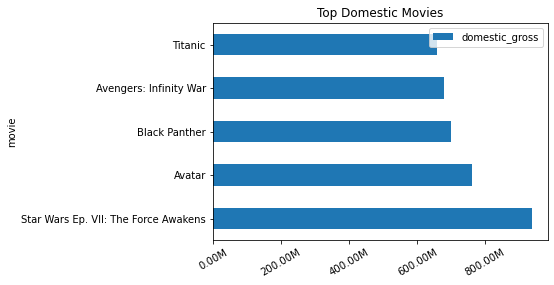

In [18]:
# plot top Domestic Gross Performers
ax = top_dom.plot.barh(x = "movie", y = "domestic_gross", title= "Top Domestic Movies");
xlabels = ['{:,.2f}'.format(x) + 'M' for x in ax.get_xticks()/1000000]
ax.set_xticklabels(xlabels, rotation = 30)
plt.show()
#plt.xticks(topdom.domestic_gross, topdom.movie, rotation=30);

In [19]:
top_world = movie_budgets.sort_values(by="worldwide_gross", ascending=False).head()
top_world

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,Dec 18 2009,Avatar,425000000,760507625,2776345279
42,43,Dec 19 1997,Titanic,200000000,659363944,2208208395
5,6,Dec 18 2015,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,Apr 27 2018,Avengers: Infinity War,300000000,678815482,2048134200
33,34,Jun 12 2015,Jurassic World,215000000,652270625,1648854864


<ipython-input-20-678a0e118a38>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 30)


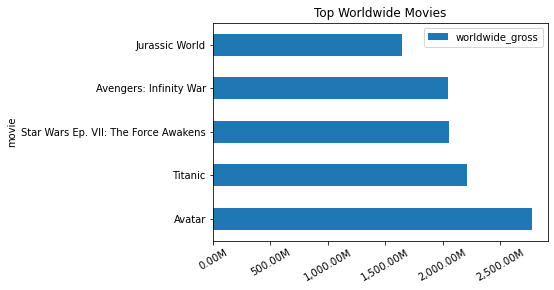

In [20]:
# plot top Worldwide Gross Performers
ax = top_world.plot.barh(x = "movie", y = "worldwide_gross", title= "Top Worldwide Movies");
xlabels = ['{:,.2f}'.format(x) + 'M' for x in ax.get_xticks()/1000000]
ax.set_xticklabels(xlabels, rotation = 30)
plt.show()

In [21]:
## CORREALATION POST JOIN BTW DOMESTIC AND WORLDWIDE, take out miscounted rows ( Black panther, Jurasic World)


## TMDB

Load Data

In [22]:
tmdb = pd.read_csv('tmdb.movies.csv')
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


Stats on Data

In [23]:
tmdb.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [24]:
tmdb.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [25]:
len(tmdb)

26517

In [26]:
type(tmdb)

pandas.core.frame.DataFrame

In [27]:
tmdb.dtypes, tmdb.describe()

(Unnamed: 0             int64
 genre_ids             object
 id                     int64
 original_language     object
 original_title        object
 popularity           float64
 release_date          object
 title                 object
 vote_average         float64
 vote_count             int64
 dtype: object,
         Unnamed: 0             id    popularity  vote_average    vote_count
 count  26517.00000   26517.000000  26517.000000  26517.000000  26517.000000
 mean   13258.00000  295050.153260      3.130912      5.991281    194.224837
 std     7654.94288  153661.615648      4.355229      1.852946    960.961095
 min        0.00000      27.000000      0.600000      0.000000      1.000000
 25%     6629.00000  157851.000000      0.600000      5.000000      2.000000
 50%    13258.00000  309581.000000      1.374000      6.000000      5.000000
 75%    19887.00000  419542.000000      3.694000      7.000000     28.000000
 max    26516.00000  608444.000000     80.773000     10.000000  2218

See most popular movies

In [28]:
most_pop =tmdb.sort_values(by="popularity", ascending=False).head()
most_pop

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673


In [29]:
diff_gen = most_pop["genre_ids"].unique()
diff_gen

array(['[12, 28, 14]', '[28, 53]', '[28, 12, 16, 878, 35]',
       '[28, 12, 14]', '[878, 28, 12]'], dtype=object)

In [30]:

for i in diff_gen:
    #concat strings of lists together
    print(i)
    map(int, i)
 ## is a number, append to list  
type(i)


[12, 28, 14]
[28, 53]
[28, 12, 16, 878, 35]
[28, 12, 14]
[878, 28, 12]


str

In order we can see, ID:28 (Action) is consistent in all of the top 5 popular content, ID:12 (Adventure) is seen 4 times , ID:878, 14, (Science Fiction, Fantasy) is seen 2 times. This insight is important because we can see overlap if certain movies shown to have the most gross revenue in movie budgets data is also present in the most popular genres. 

In [31]:
most_pop.loc[tmdb.original_title == "Avatar"]
#df.loc[df['column_name'] == some_value]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count


In [32]:
most_pop.loc[tmdb.original_title == "Avengers: Infinity War"]


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948


In [33]:
most_pop.loc[tmdb.original_title == "Star Wars"]


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count


In [34]:
most_pop.loc[tmdb.original_title == "Titanic"]


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count


In [35]:
top_dom

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5,6,Dec 18 2015,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
0,1,Dec 18 2009,Avatar,425000000,760507625,2776345279
41,42,Feb 16 2018,Black Panther,200000000,700059566,1348258224
6,7,Apr 27 2018,Avengers: Infinity War,300000000,678815482,2048134200
42,43,Dec 19 1997,Titanic,200000000,659363944,2208208395


In [36]:
most_pop

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
